# Exercises

## Exercise 1: explore filter parameters
---
In this exercises you will explore how different parameters affect the filtering process.
- Import the data form `data/moving_lfp.pickle` (the file is already on your machine if you run the `download_data()` cell in the main lesson)
- Take a few seconds of the data, and filter them in different frequency bands. Plot the resulting singal.
  Fix the central frequency and play with the width of the band, then try to change the central frequency of the band.
- Change the order of the filter, keeping the frequency band fixed. How does the filtered signal change? How does the computing time change? (You can try to quantify the computing time with the jupyter magic command [`%timeit`](https://docs.python.org/3/library/timeit.html) )
- Comment on what you see

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("code"))
from utils import download_data
import lfp_functions as lf
from scipy.signal import butter, sosfilt
from scipy.fft import fft, fftfreq

In [65]:
# Load Data 
with open("data/moving_lfp.pickle", "rb") as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']
print(f'Loaded {len(lfp)/sampling_rate} seconds of LFP, sampled at {sampling_rate} Hz')

Loaded 600.133 seconds of LFP, sampled at 1000.0 Hz


Text(0.5, 1.0, 'Filtered Signals with varying Bandwidths')

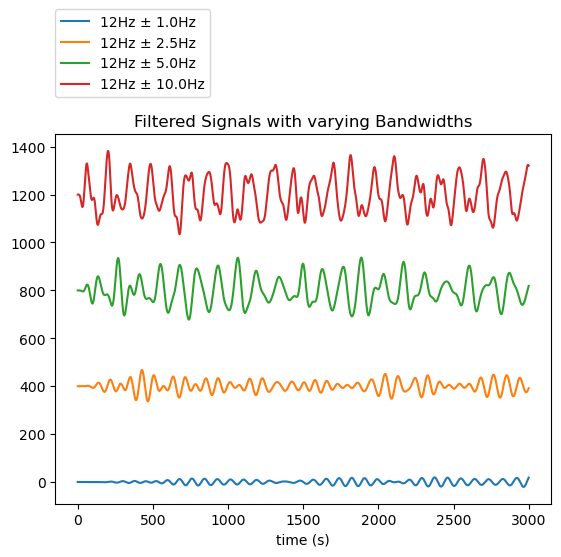

In [71]:
# Fix the central frequency and play with the width of the band

filter_order = 5 #the higher the order, the sharper the filter frequency response, 
                 #but with more computations and potental numerical instability
central_f = 12
bandwidth = [2,5,10,20]
plot_offset = 400

for i, bw in enumerate(bandwidth):
    low_f = central_f - bw/2
    high_f = central_f + bw/2
    # define filter object
    filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
    # apply filter to lfp
    filtered_signal = sosfilt(filter, lfp)
    plt.plot(filtered_signal[:3000] + i * plot_offset, label=f'{central_f}Hz ± {bw/2}Hz')

plt.xlabel('time (s)')
plt.legend(loc=(0,1.1))
plt.title("Filtered Signals with varying Bandwidths")

- Narrow bandwidth: the signal looks simple and more periodic
- Increasing bandwidth: the signal looks increasingly more complex, as it contains more frequency components


Text(0.5, 1.0, 'Filtered Signals with varying Central Frequency')

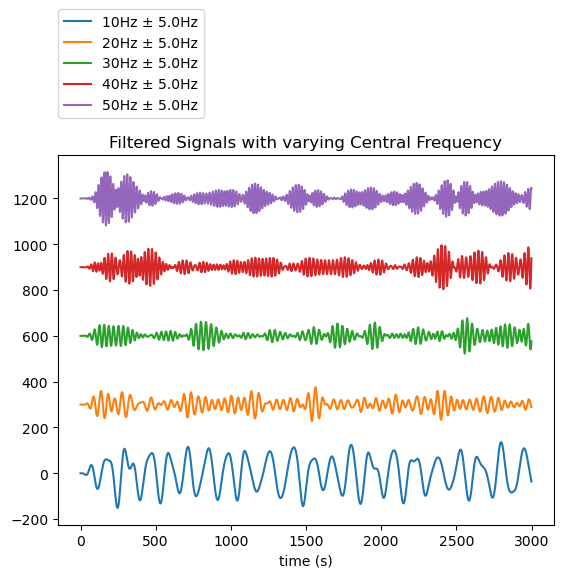

In [72]:
# Fixed bandwidth and changing central frequency

filter_order = 5 

central_f = [10, 20, 30, 40, 50]
bandwidth = 10
plot_offset = 300

for i, f in enumerate(central_f):
    low_f = f - bandwidth/2
    high_f = f + bandwidth/2
    # define filter object
    filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
    # apply filter to lfp
    filtered_signal = sosfilt(filter, lfp)
    plt.plot(filtered_signal[:3000] + i * plot_offset, label=f'{f}Hz ± {bandwidth/2}Hz')

plt.xlabel('time (s)')
plt.legend(loc=(0,1.1))
plt.title("Filtered Signals with varying Central Frequency")

- As the central frequency increases, the filtered signal becomes faster (i.e. more oscillations per second)
- Higher frequency components start emerging
- The shape of the waveforms changes

Text(0.5, 1.0, 'Filtered Signals with Constant Bandwidth but changing filter order')

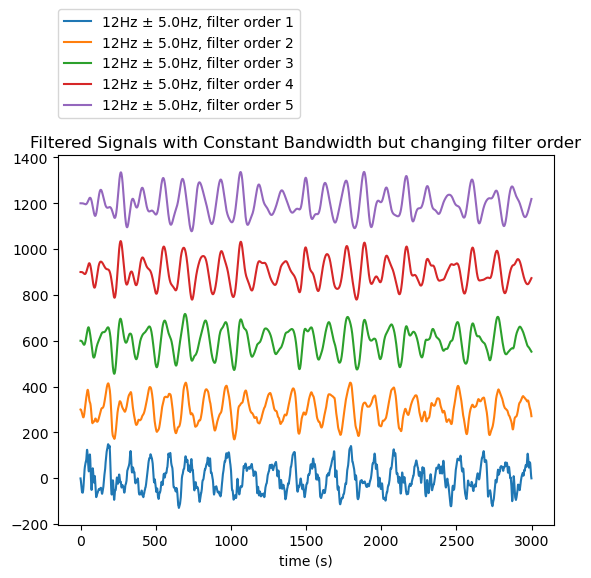

In [81]:
# Changing order of the filter

filter_order = [1,2,3,4,5] 

central_f = 12
bandwidth = 10
plot_offset = 300

for i, o in enumerate(filter_order):
    low_f = central_f - bandwidth/2
    high_f = central_f + bandwidth/2
    # define filter object
    filter = butter(o,[low_f,high_f], btype='band', output='sos', fs=sampling_rate)
    # apply filter to lfp
    filtered_signal = sosfilt(filter, lfp)
    plt.plot(filtered_signal[:3000] + i * plot_offset, label=f'{central_f}Hz ± {bandwidth/2}Hz, filter order {o}')

plt.xlabel('time (s)')
plt.legend(loc=(0,1.1))
plt.title("Filtered Signals with Constant Bandwidth but changing filter order")

In [82]:
# Timing
for o in filter_order:
    low_f = central_f - bandwidth / 2
    high_f = central_f + bandwidth / 2
    sos = butter(o, [low_f, high_f], btype='band', output='sos', fs=sampling_rate)

    print(f"Filter order: {o}")
    %timeit sosfilt(sos, lfp)

Filter order: 1
6.27 ms ± 640 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Filter order: 2
5.49 ms ± 189 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Filter order: 3
5.63 ms ± 74.1 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Filter order: 4
6.5 ms ± 114 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Filter order: 5
8.26 ms ± 344 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


- the computing time increases with filter order

In [ ]:
# Filter data in different frequency bands
delta_lfp = lf.bandpass_filter(lfp, low_f = 1, high_f = 4, sampling_rate = sampling_rate)
theta_lfp = lf.bandpass_filter(lfp, low_f = 4, high_f = 8, sampling_rate = sampling_rate)
alpha_lfp = lf.bandpass_filter(lfp, low_f = 8, high_f = 12, sampling_rate = sampling_rate)
beta_lfp = lf.bandpass_filter(lfp, low_f = 12, high_f = 30, sampling_rate = sampling_rate)
gamma_lfp = lf.bandpass_filter(lfp, low_f = 30, high_f = 100, sampling_rate = sampling_rate)

plot_offset = 400 #to plot the signal on different lines

# to select first three seconds of data, take first 3000 data points, as sampling rate = 1000 Hz
plt.figure(figsize=(15,5))
plt.plot(delta_lfp[:3000]+4*plot_offset,label = 'delta (1-4 Hz)') 
plt.plot(theta_lfp[:3000]+3*plot_offset,label = 'theta (4-8 Hz)')
plt.plot(alpha_lfp[:3000]+2*plot_offset,label = 'alpha (8-12 Hz)')
plt.plot(beta_lfp[:3000]+plot_offset,label = 'beta (12-30 Hz)')
plt.plot(gamma_lfp[:3000],label = 'gamma (30-100 Hz)')

plt.axis('off')
plt.legend(loc=(0,1))

## Exercise 2: wavelet transform with real wavelets
---
In this exercises you will explore the difference between real and complex wavelets in the continous wavelet transform.
- Import the data form `data/moving_lfp.pickle`
- Select a period of a few seconds of the signal and compute the spectrogram. 
  Try the wavelet transform with wavelet `mexh` (mexican hat),`gaus` (gaussian) and `morl` (morlet). These are all real wavelets.
- What differences do you see with respect to the spectrum computed with the complex Morlet tranform ? Comment on why do you think this might be the case.

## Exercise 3: REM sleep detection
---
Mammalian sleep is organized in different phases. [Rapid Eye Movement (REM) sleep](https://en.wikipedia.org/wiki/Rapid_eye_movement_sleep) is a well studied phase, with clear markers that make it detectable from LFP data. One of the most used marker is the ratio (or difference) between the oscillatory power in the theta and delta bands in the hippocampus. During REM sleep, the former dominates, in a pattern that resembles active behaviour.  
In this exercise we will use the tools we learned about to detect and inspect the REM and non-REM (nREM) phases of sleep in data recorded from the hippocampus of a sleeping mouse.

- Import the data form `data/moving_lfp.pickle`
- Compute the instantaneous power in the theta (6-10 Hz) and delta (2-4 Hz) frequency bands, for the whole signal.
- z-score the two power signals (subtract the mean and divide by the standard deviation, you can use `scipy.stats.zscore()`)
- Compute and plot the power difference (`theta_power - delta_power`) for the sleep session.
- Compute the REM (power difference $>0.2$) and nREM (power diffewrence $<0.2$) sleep periods.
- Plot examples of REM vs nREM lfp signals (wideband filtered betw. 1 and 200 Hz to get rid of some of the noise).
- Explore how changing the threshold affects the amount of REM sleep detected.